<a href="https://colab.research.google.com/github/msinan52/NLP9Hafta/blob/main/2_distilbert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set_style("white")
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import nltk
from nltk.corpus import stopwords
import textblob
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/__1-IEEE_NEWS

Mounted at /content/drive
/content/drive/My Drive/__1-IEEE_NEWS


In [3]:
df = pd.read_csv("sonpre.csv")
df.head()

,Text,Label
0,real number death,0
1,taking dioxide help fight coronavirus,0
2,video show u state florida,0
3,predicted coronavirus outbreak,0
4,chinese president mosque amid coronavirus outb...,0


In [4]:
# Train and Test Split
from sklearn import model_selection, preprocessing
x_train, x_test, y_train, y_test = model_selection.train_test_split(df["Text"], df["Label"], random_state=21, test_size=0.30)

## Transformer Tabanlı Gömme (BERT, DistilBERT, RoBERTa, ALBERT)

In [5]:
!pip install transformers datasets --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 20.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12=

#distilbert

In [6]:

from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
import pandas as pd

# Model adı buradan değiştirilebilir
model_name = 'distilbert-base-uncased'  # Alternatifler: 'bert-base-uncased', 'roberta-base', 'albert-base-v2'

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

def get_embeddings(text_list):
    embeddings = []
    for text in text_list:
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128)
        with torch.no_grad():
            outputs = model(**inputs)
            cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
            embeddings.append(cls_embedding)
    return np.array(embeddings)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [7]:

# NaN temizliği
x_train = x_train.fillna('')
x_test = x_test.fillna('')

# Metin gömme işlemi
x_train_embed = get_embeddings(x_train.tolist())
x_test_embed = get_embeddings(x_test.tolist())


## ML Modelleri ile Eğitim (BERT Gömmeleri Kullanılarak)

In [8]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train_embed, y_train)
y_pred = lr.predict(x_test_embed)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1180
           1       0.90      0.93      0.92      1097

    accuracy                           0.92      2277
   macro avg       0.92      0.92      0.92      2277
weighted avg       0.92      0.92      0.92      2277



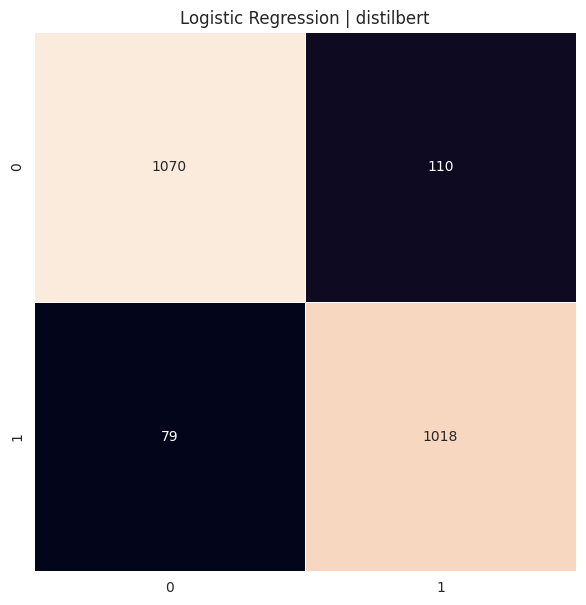

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
plt.title("Logistic Regression | distilbert")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()